In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import bokeh 

In [4]:
%matplotlib inline 

# Nettoyage des bases

## FQMs


```
On dispose des fichiers : fqm_[1-53]_2015, fqm_[1-52]_2016 et fqm_[1-41]_2017.

On a donc les estimations depuis le 01/01/2015 jusqu'au 22/10/2017

#   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 1   Jour                    656768 non-null  float64   -----> date du vol (jour)
 2   Tav                     656768 non-null  object    -----> type avion
 3   Cie                     656768 non-null  object    -----> code de compagnie ex. EZY
 4   Ligne                   656768 non-null  object    -----> numéro de ligne ex. 4060
 5   A/D                     656768 non-null  object    -----> arrivée ou départ 
 6   Aérog                   656768 non-null  object    -----> code aérogare ex. OS pour orly sud
 7   Hor                     656768 non-null  object    -----> heure du vol
 8   Sièges Corrections_ICI  656768 non-null  float64   -----> correction du nombre de sièges estimé (?) ex. 114
 9   Pax Estimés             654403 non-null  float64   -----> nombre de passagers estimés ex.167.22
 10  Prov/Dst                656768 non-null  object    -----> code aéroport de provenance ex. JFK
 11  Pays                    656768 non-null  object    -----> code pays d'A/D ex. US
 12  Qualité                 656768 non-null  object    -----> Faisceau qualité (code MTP, CEE, INT etc.) 
 13  Crit. Douanier          656768 non-null  object    -----> critère douanier H ou D
 14  Faisceau                656768 non-null  float64   -----> code Faisceau de 1 à 5
 15  LF%                     654403 non-null  float64   -----> LF% taux de remplissage estimé ex. 0.929 pour 92.9%
 16  IATA                    656768 non-null  object    -----> 
 17  Cpt Mvt                 656768 non-null  float64   -----> 
 18  Faisc. IATA             656768 non-null  object    -----> 
 19  Date du vol             656812 non-null  object    -----> date du vol (jour + hor)
 20  NB Sieges specif        656812 non-null  object    -----> nombre de sièges spécifiques au vol
 21  NB Sieges Standard      656768 non-null  object    -----> nombre de sièges standards (pas toujours inf à nb sieges specif)
 22  Date Equiv              656768 non-null  object    -----> date equiv avec laquelle on a fait les prévisions
 23  CLE SYNTH.              656768 non-null  object    -----> clef = code aerogarde+A/D+faisceau
 24  Semaine                 656768 non-null  float64   -----> numéro de la semaine
 25  CLE S/T                 656768 non-null  object    -----> 
dtypes: float64(7), int64(1), object(18)
memory usage: 130.3+ MB


On cherche à agréger les estimations au niveau faisceau. 

```


Comme il y a des défauts dans les bases 2015 et 2017 en particulier, on concatène et récupère les FQMs pour l'année 2016. 

In [5]:
# Charger la base dans fqms 
fqms = pd.read_csv('https://raw.githubusercontent.com/erialc-cal/StatApp_2020/main/Data/FQMs/fqms_2016.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
fqms = fqms.drop(columns='Unnamed: 0')

KeyError: ignored

In [69]:
fqms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238596 entries, 0 to 238697
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Jour                    238596 non-null  int64         
 1   Tav                     238596 non-null  object        
 2   Cie                     238596 non-null  object        
 3   Ligne                   238596 non-null  object        
 4   A/D                     238596 non-null  object        
 5   Aérog                   238596 non-null  object        
 6   Hor                     238596 non-null  object        
 7   Sièges Corrections_ICI  238596 non-null  int64         
 8   Pax Estimés             238596 non-null  float64       
 9   Prov/Dst                238596 non-null  object        
 10  Pays                    238596 non-null  object        
 11  Qualité                 238596 non-null  object        
 12  Crit. Douanier          238596

Affichage des valeurs possibles dans chaque colonne pour une vérification rapide des erreurs possibles.

In [70]:
for elem in fqms.columns.tolist() :
  print(elem, pd.unique(fqms[elem]))

Jour [1 2 3 4 5 6 7]
Tav ['320' 'BEH' '319' '321' '73H' '333' '744' '332' '738' '32A' '763' 'AB6'
 'AR8' '736' '73G' 'CRK' 'AT7' 'AT5' 'CR7' 'ER4' 'E95' '77W' '343' 'DH4'
 '75W' '73W' 'IL9' '772' '100' '788' 'AR1' 'E90' 'E75' '752' '342' '345'
 '762' '346' 'AT4' '32B' 'E70' '734' '733' '76W' '31A']
Cie ['EZY' 'UD' 'EZS' 'AB' 'ZI' 'TO' 'DY' 'TX' 'SS' 'TU' 'AH' 'AT' 'PC' 'HV'
 'IR' 'TF' 'CU' 'PLM' 'AF' 'A5' 'T7' 'XK' 'TP' 'VY' 'UX' 'IB' 'AZ' 'BE'
 'BA' 'WX' 'EC' 'JAF' 'KM' 'T3' 'FI' 'FV' 'TB' 'BF' 'D8']
Ligne [4060 450 4020 ... 5212 4001 9040]
A/D ['A' 'D']
Aérog ['OS' 'OW']
Hor ['08:00:00' '08:10:00' '10:00:00' '10:25:00' '11:20:00' '11:40:00'
 '14:50:00' '16:30:00' '18:25:00' '18:40:00' '20:25:00' '21:10:00'
 '22:15:00' '22:20:00' '07:45:00' '08:40:00' '09:15:00' '09:50:00'
 '10:05:00' '10:35:00' '10:45:00' '10:50:00' '10:55:00' '11:10:00'
 '12:00:00' '12:20:00' '12:25:00' '13:05:00' '13:20:00' '13:35:00'
 '14:20:00' '14:30:00' '16:25:00' '16:50:00' '17:10:00' '17:20:00'
 '17:25:00' '1

In [ ]:
fqms['Date du vol']

0         2016-01-04
1         2016-01-04
2         2016-01-04
3         2016-01-04
4         2016-01-04
             ...    
238693    2017-01-01
238694    2017-01-01
238695    2017-01-01
238696    2017-01-01
238697    2017-01-01
Name: Date du vol, Length: 238698, dtype: object

In [ ]:
fqms.head()

,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,LPY,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,19,8,2015-01-05,OSA2,0.72,1,OS1A1
2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,TLS,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1


In [ ]:
fqms_fsc_jour = fqms.groupby(['Date du vol','Qualité']).agg({'Pax Estimés':'sum', 'Sièges Corrections_ICI':'sum','Faisceau':'mean', '%Rempl':'mean'})

In [ ]:
fqms_fsc_jour['Jour']=fqms_fsc_jour.index

In [ ]:
fqms_fsc_jour

Pax Estimés  ...               Jour
Date du vol Qualité                ...                   
2016-01-04  CEE       1587.500000  ...  (2016-01-04, CEE)
            DTM      12439.470600  ...  (2016-01-04, DTM)
            INT      15899.245800  ...  (2016-01-04, INT)
            MTP      26146.385200  ...  (2016-01-04, MTP)
            SCH      26262.760000  ...  (2016-01-04, SCH)
...                           ...  ...                ...
2017-01-01  CEE       1670.179000  ...  (2017-01-01, CEE)
            DTM       9605.009000  ...  (2017-01-01, DTM)
            INT      22038.135263  ...  (2017-01-01, INT)
            MTP      23196.038000  ...  (2017-01-01, MTP)
            SCH      26771.988000  ...  (2017-01-01, SCH)

[1820 rows x 5 columns]

## Historiques

In [ ]:
histo = pd.read_csv('/content/histo_2016.csv')
histo = histo.drop(columns='Unnamed: 0')


In [ ]:
histo

,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,Ville,Aéroport,Code aéroport IATA,Code aéroport OACI,Type de mouvement,Type avion,Sous-type avion,Plateforme,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI
0,2016-07-31,2016/07/31 16:10:00,2016/07/31 18:53:00,CUBANA,CU,CUB,CU445,International,CUBA,La Havane Jose Marti Intl,La Havane Jose Marti Intl,HAV,MUHA,Départ,IL9,I93,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,252.0,262.0
1,2016-03-30,2016/03/30 19:15:00,2016/03/30 19:33:00,HOP!,A5,HOP,A59601,Schengen,ESPAGNE,Valladolid,Valladolid,VLL,LEVD,Arrivée,CRJ,CR7,ORLY,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1.0,1.0,43.0,50.0
2,2016-01-23,2016/01/23 15:25:00,2016/01/23 16:57:00,CORSAIR INTL,SS,CRL,CRL990,International,SENEGAL,DAKAR,DAKAR,DKR,GOOY,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,298.0,350.0
3,2016-01-20,2016/01/20 19:20:00,2016/01/20 19:31:00,CORSAIR INTL,SS,CRL,CRL874,International,MADAGASCAR,Antananarivo,Antananarivo,TNR,FMMI,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,149.0,350.0
4,2016-01-05,2016/01/05 09:55:00,2016/01/05 09:41:00,CORSAIR INTL,SS,CRL,CRL925,Dom Tom,FRANCE MARTINIQUE,Fort De France Lamentin,Fort De France Lamentin,FDF,TFFF,Arrivée,330,333,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,332.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,2016-08-24,2016/08/24 15:30:00,2016/08/24 16:20:00,TRANSAVIA.COM,TO,TVF,TO3212,International,TUNISIE,Monastir Skanes,Monastir Skanes,MIR,DTMB,Départ,737,73H,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,124.0,143.0
18913,2016-08-24,2016/08/24 16:20:00,2016/08/24 16:34:00,AIR MAURITIUS,MK,MAU,MK045,International,MAURICE (ILE),Sir s.ramboolam Intl,Sir s.ramboolam Intl,MRU,FIMP,Départ,340,343,CDG,CDG,Charles de Gaulle,CDG2,CDG2,T2E,Terminal 2E,1.0,1.0,220.0,298.0
18914,2016-08-24,2016/08/24 06:55:00,2016/08/24 07:25:00,TRANSAVIA.COM,TO,TVF,TO075,National,FRANCE,Paris Charles-de-Gaulle,Paris Charles-de-Gaulle,CDG,LFPG,Arrivée,737,73H,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1.0,1.0,0.0,143.0
18915,2016-08-23,2016/08/23 13:25:00,2016/08/23 13:39:00,CHINA EASTERN,MU,CES,MU554,International,CHINE,Shanghai Pu Dong,Shanghai Pu Dong,PVG,ZSPD,Départ,330,332,CDG,CDG,Charles de Gaulle,CDG2,CDG2,T2E,Terminal 2E,1.0,1.0,211.0,350.0


In [ ]:
pd.unique(histo['Nombre de mouvements réalisés'])

array([ 1., nan])

In [ ]:
from tqdm import tqdm
histo['code_fsc']=histo['Faisceau facturation']

In [ ]:
for i in tqdm(range(len(histo['code_fsc']))) : 
#Recodage de 'Faisceau facturation'
    if histo['Faisceau facturation'][i] == 'Schengen' : 
        histo['code_fsc'][i] = 'SCH'
    if histo['Faisceau facturation'][i] == 'International' : 
        histo['code_fsc'][i] = 'INT'
    if histo['Faisceau facturation'][i] == 'Autre UE' : 
        histo['code_fsc'][i] = 'CEE'
    if histo['Faisceau facturation'][i] == 'National' : 
        histo['code_fsc'][i] = 'MTP'
    if histo['Faisceau facturation'][i] == 'Dom Tom' : 
        histo['code_fsc'][i] = 'DTM'


  0%|          | 0/18917 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/l

In [ ]:
histo_fsc_jour=histo.groupby(['Jour','code_fsc']).agg({'Nombre de passagers réalisés':'sum', 'Nombre de mouvements réalisés':'sum'})

In [ ]:
histo_fsc_jour['Jour']=histo_fsc_jour.index

In [ ]:
histo_fsc_jour['Jour']

Jour        code_fsc
2016-01-05  DTM         (2016-01-05, DTM)
            INT         (2016-01-05, INT)
            MTP         (2016-01-05, MTP)
            SCH         (2016-01-05, SCH)
2016-01-06  DTM         (2016-01-06, DTM)
                              ...        
2016-12-31  MTP         (2016-12-31, MTP)
            SCH         (2016-12-31, SCH)
2017-01-01  DTM         (2017-01-01, DTM)
            INT         (2017-01-01, INT)
            MTP         (2017-01-01, MTP)
Name: Jour, Length: 1654, dtype: object

## Correspondance FQMs et histo vol à vol 

Création d'une clef Type avion+Compagnie de vol+Ligne de vol

In [ ]:
fqms['clef_histo']=fqms['Cie'].astype('str')+fqms['Ligne'].astype('str')+fqms['Qualité']

In [ ]:
fqms.sort_values(by='clef_histo')

,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T,clef_histo
224964,5,AT4,A5,210,A,OW,07:50:00,50,40.000,LAI,FR,MTP,H,1,0.800,J,1,000A,2016-12-09,50,48,2014-12-12,OWA2,0.800,49,OW5A1,A5210MTP
115111,2,AT4,A5,210,A,OW,07:50:00,50,37.500,LAI,FR,MTP,H,1,0.750,J,1,000A,2016-06-28,50,48,2015-06-30,OWA2,0.750,26,OW2A1,A5210MTP
34990,5,AT5,A5,210,A,OW,07:50:00,50,39.000,LAI,FR,MTP,H,1,0.780,J,1,000A,2016-03-04,50,50,2015-02-27,OWA2,0.780,9,OW5A1,A5210MTP
120412,2,AT4,A5,210,A,OW,07:50:00,50,37.000,LAI,FR,MTP,H,1,0.740,J,1,000A,2016-07-05,50,48,2015-07-07,OWA2,0.740,27,OW2A1,A5210MTP
18272,5,AT5,A5,210,A,OW,07:50:00,50,35.500,LAI,FR,MTP,H,1,0.710,J,1,000A,2016-02-05,50,50,2015-02-06,OWA2,0.710,5,OW5A1,A5210MTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235990,7,320,ZI,979,D,OS,09:00:00,174,116.580,SID,CV,INT,D,5,0.670,C,1,341G,2017-01-01,174,150,2012-01-01,OSD5,0.670,52,OS7D5,ZI979INT
231834,7,320,ZI,979,D,OS,09:00:00,174,142.680,SID,CV,INT,D,5,0.820,C,1,341G,2016-12-25,174,150,2015-12-27,OSD5,0.820,51,OS7D5,ZI979INT
235919,7,320,ZI,980,A,OS,21:30:00,174,150.510,SID,CV,INT,D,5,0.865,C,1,341G,2017-01-01,174,150,2012-01-01,OSA5,0.865,52,OS7A5,ZI980INT
178288,5,320,ZI,981,D,OS,09:15:00,174,157.992,FAO,PT,SCH,S,2,0.908,C,1,1311,2016-09-30,174,150,2015-10-02,OSD2,0.908,39,OS5D2,ZI981SCH


In [ ]:
histo['clef_fqms']=histo['Numéro de vol']+histo['code_fsc']

In [ ]:
df1 = fqms.groupby(['clef_histo', 'Date du vol']).mean()

In [ ]:
df1

Jour  Sièges Corrections_ICI  ...  %Rempl  Semaine
clef_histo Date du vol                                ...                 
A5210MTP   2016-01-04      1                      50  ...   0.780        1
           2016-01-05      2                      50  ...   0.688        1
           2016-01-06      3                      50  ...   0.670        1
           2016-01-07      4                      50  ...   0.670        1
           2016-01-08      5                      50  ...   0.680        1
...                      ...                     ...  ...     ...      ...
ZI979INT   2016-12-25      7                     174  ...   0.820       51
           2017-01-01      7                     174  ...   0.670       52
ZI980INT   2017-01-01      7                     174  ...   0.865       52
ZI981SCH   2016-09-30      5                     174  ...   0.908       39
ZI982SCH   2016-10-02      7                     174  ...   0.924       39

[238653 rows x 8 columns]

In [ ]:
df2 = histo.groupby(['clef_fqms', 'Jour']).mean()

In [ ]:
df2.sort_values(by='clef_fqms')

Nombre de mouvements réalisés  ...  Sièges Corrections_ICI
clef_fqms Jour                                       ...                        
6F101SCH  2016-07-03                            1.0  ...                   143.0
9W123INT  2016-09-16                            1.0  ...                   350.0
          2016-09-14                            1.0  ...                   350.0
          2016-09-10                            1.0  ...                   350.0
          2016-09-06                            1.0  ...                   350.0
...                                             ...  ...                     ...
ZT291CEE  2016-06-25                            1.0  ...                   143.0
ZT302CEE  2016-02-17                            1.0  ...                   202.0
ZT4901SCH 2016-05-31                            1.0  ...                   143.0
ZT490YCEE 2016-05-31                            1.0  ...                   143.0
ZTN003INT 2016-11-11                            1.0  ...                   143.0

[56179 rows x 4 columns]

In [ ]:
df_merged = pd.merge(df1, df2)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [ ]:
df_merged = df1.merge(df2, how="outer", left_index=True, right_index=True)

In [ ]:
df_merged.head()

,Jour,Sièges Corrections_ICI,Pax Estimés,Faisceau,LF%,Cpt Mvt,%Rempl,Semaine,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés
0,7,100,86.0,1,0.86,1,0.86,43,1.0,1.0,32.0
1,7,100,86.0,1,0.86,1,0.86,43,1.0,1.0,24.0
2,7,100,86.0,1,0.86,1,0.86,43,1.0,1.0,109.0
3,7,100,86.0,1,0.86,1,0.86,43,1.0,1.0,43.0
4,7,100,86.0,1,0.86,1,0.86,43,1.0,1.0,17.0


## Correspondance journalière/faisceau histo et FQMs

In [ ]:
fqms_sans_ad = fqms[fqms['A/D']=='A']

fqms_fsc_jour_2 = fqms_sans_ad.groupby(['Date du vol','Qualité']).agg({'Pax Estimés':'sum', 'Sièges Corrections_ICI':'sum','Faisceau':'mean', '%Rempl':'mean'})
fqms_fsc_jour_2['Jour']=fqms_fsc_jour_2.index


In [ ]:
df_jour = pd.concat([fqms_fsc_jour_2, histo_fsc_jour], axis=1)

In [ ]:
df_jour.tail(20)

Pax Estimés  ...               Jour
2016-12-29 CEE    947.400000  ...                NaN
           DTM   5363.180000  ...  (2016-12-29, DTM)
           INT   8355.810000  ...  (2016-12-29, INT)
           MTP  13572.400000  ...  (2016-12-29, MTP)
           SCH  15701.310000  ...  (2016-12-29, SCH)
2016-12-30 CEE   1130.810000  ...                NaN
           DTM   5025.010000  ...  (2016-12-30, DTM)
           INT   9946.590000  ...  (2016-12-30, INT)
           MTP  14636.200000  ...  (2016-12-30, MTP)
           SCH  16242.790000  ...  (2016-12-30, SCH)
2016-12-31 CEE    501.900000  ...                NaN
           DTM   5916.200000  ...  (2016-12-31, DTM)
           INT  11896.826535  ...  (2016-12-31, INT)
           MTP   9765.720000  ...  (2016-12-31, MTP)
           SCH  12082.580000  ...  (2016-12-31, SCH)
2017-01-01 CEE    904.589000  ...                NaN
           DTM   5442.559000  ...  (2017-01-01, DTM)
           INT  12491.895263  ...  (2017-01-01, INT)
           MTP  11632.448000  ...  (2017-01-01, MTP)
           SCH  15389.208000  ...                NaN

[20 rows x 8 columns]

Décalages étonnants entre pax estimés et passagers réalisés. 

# Visualisation des informations FQMs par jour

## Comparaison des différentes données sièges 


In [23]:
from bokeh.plotting import figure, output_notebook, show
fqms = fqms[fqms['Date du vol'].notna()].reset_index(drop = True)
fqms = fqms[fqms['Date du vol'].str.contains('20')].reset_index(drop = True)

fqms = fqms[fqms['NB Sieges specif']!='nc']

fqms = fqms[fqms['NB Sieges Standard']!='nc']


In [24]:
fqms = fqms.astype({'Date du vol': 'datetime64[ns]','Date Equiv': 'datetime64[ns]', 'NB Sieges specif' : 'float64', 'NB Sieges Standard': 'float64'})
fqms['Date du vol'] = pd.to_datetime(fqms['Date du vol'], format='%Y%m%d')
fqms_jour =fqms.groupby(fqms['Date du vol']).sum()



# données à observer
NBSSP = np.array(fqms_jour['NB Sieges specif'])
NBSST = np.array(fqms_jour['NB Sieges Standard'])
NBSCor =  np.array(fqms_jour['Sièges Corrections_ICI'])


In [ ]:
# On convertit en float afin de pouvoir afficher les régressions linéaires
def datetime_to_float(d):
    return d.timestamp()

fqms_date = []
for elem in fqms_jour.index:
  fqms_date.append(datetime_to_float(elem))
  
fqms_date = np.array(fqms_date)

In [25]:
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope

def reg_line(x, y, color):
# Make and fit a linear regression model
  model = LinearRegression().fit(x.reshape(-1, 1), y)
# x values need to be in a two-dimensional array, so use .reshape(-1, 1)

# Find the slope and intercept from the model
  slope = model.coef_[0] # Takes the first element of the array
  intercept = model.intercept_

# Make the regression line
  regression_line = Slope(gradient=slope, y_intercept=intercept, line_color=color)
  return regression_line


In [ ]:
window_size = 100
window = np.ones(window_size)/float(window_size)

# # données moyennées
# nbssp_avg = np.convolve(NBSSP, window, 'same')
# nbsst_avg = np.convolve(NBSST, window, 'same')
# nbcor_avg = np.convolve(NBSCor, window, 'same')

# alternative : output document HTML statique avec output_file()
output_notebook()

# plot avec un axe de type datetime 
p = figure(plot_width=800, plot_height=350, x_axis_type="linear")

# ajout points figure
p.circle(fqms_date, NBSSP, size=4, color='green', alpha=0.2, legend_label='Sièges spécifiques')
#p.line(dates, nbssp_avg, color='navy', legend_label='Sièges spécifiques')
p.circle(fqms_date, NBSST, size=4, color='navy', alpha=0.2, legend_label='Sièges standard')
#p.line(dates, nbsst_avg, color='navy', legend_label='Sièges standard')
p.circle(fqms_date, NBSCor, size=4, color='red', alpha=0.2, legend_label='Sièges corrigés')
#p.line(dates, nbcor_avg, color='navy', legend_label='Sièges corrigés')

# Interpolation 
#NBSSP_predict=best_fit_line(dates, NBSSP)
#p.line(dates,NBSSP_predict,color='green',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
#NBSST_predict=best_fit_line(dates, NBSST)
#p.line(dates,NBSST_predict,color='navy',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
#NBSCor_predict=best_fit_line(dates, NBSCor)
#p.line(dates,NBSCor_predict,color='red',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
  
NBSSP_rl = reg_line(fqms_date, NBSSP, 'green')
p.add_layout(NBSSP_rl)
NBSST_rl = reg_line(fqms_date, NBSST, 'navy')
p.add_layout(NBSST_rl)
NBSCor_rl = reg_line(fqms_date, NBSCor, 'red')
p.add_layout(NBSCor_rl)


p.title.text = "Visualisation des sièges renseignés"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date convertie en jours'
p.yaxis.axis_label = 'Nombre de sièges'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

show(p)


Les sièges spécifiques correspondent aux sièges corrigés. Le nombre de sièges standard est en général inférieur au nombre de sièges spécifiques. 

## Données passagers estimés, passagers réalisés et remplissage

In [ ]:
fqms_jour =fqms.groupby(fqms['Date du vol']).agg({'Pax Estimés': 'sum', 'LF%': 'mean'})
# données à observer
pax = np.array(fqms_jour['Pax Estimés'])
lf = np.array(fqms_jour['LF%'])

In [ ]:
histo_jour=histo.groupby(histo['Jour']).agg({'Nombre de passagers réalisés':'sum', 'Nombre de mouvements réalisés':'sum'})
par = np.array(histo_jour['Nombre de passagers réalisés'])

In [ ]:
window_size = 100
window = np.ones(window_size)/float(window_size)

p1 = figure(plot_width=800, plot_height=350, x_axis_type="linear")
p2 = figure(plot_width=800, plot_height=350, x_axis_type="linear")

p1.circle(fqms_date, pax, size=4, color='red', alpha=0.2, legend_label='Passagers estimés')
p1.circle(fqms_date, par, size=4, color='navy', alpha=0.2, legend_label='Passagers réalisés')
p2.circle(fqms_date, lf, size=4, color='navy', alpha=0.2, legend_label='LF%')

pax_rl = reg_line(fqms_date, pax, 'red')
p1.add_layout(pax_rl)
lf_rl = reg_line(fqms_date, lf, 'navy')
p2.add_layout(lf_rl)


p1.title.text = "Visualisation des données passagers et remplissage"
p1.legend.location = "top_left"
p1.grid.grid_line_alpha = 0
p1.xaxis.axis_label = 'Date convertie en jours'
p2.title.text = "Visualisation des données passagers et remplissage"
p2.legend.location = "top_left"
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date convertie en jours'
p1.yaxis.axis_label = 'Nombre de passagers estimés'
p2.yaxis.axis_label = '% de remplissage'
p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.1
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1
show(p1)
show(p2)


# Visualisation des informations par faisceaux par semaine

Sur la base des FQMs agrégées par semaine. 

In [87]:
fqms

,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,LPY,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,19.0,8.0,2015-01-05,OSA2,0.72,1,OS1A1
2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,TLS,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238693,7,319,BA,337,D,OW,19:55:00,126,100.80,LHR,GB,CEE,D,4,0.80,J,1,1100,2017-01-01,126.0,145.0,2016-01-01,OWD5,0.80,52,OW7D4
238694,7,DH4,BE,3048,D,OW,21:10:00,80,64.00,SOU,GB,CEE,D,4,0.80,J,1,1100,2017-01-01,80.0,70.0,2016-01-01,OWD5,0.80,52,OW7D4
238695,7,75W,EC,8005,D,OW,10:45:00,114,102.60,JFK,US,INT,D,5,0.90,J,1,4500,2017-01-01,114.0,243.0,2016-01-01,OWD5,0.90,52,OW7D5
238696,7,772,AF,32,D,OW,11:00:00,309,278.10,JFK,US,INT,D,5,0.90,J,1,4500,2017-01-01,309.0,288.0,2016-01-01,OWD5,0.90,52,OW7D5


In [73]:
fqms_weekly = fqms.groupby('Semaine').agg({'Pax Estimés':'sum','LF%':'mean'})


In [82]:
fqms_weekly['Semaine']=fqms_weekly.index

Text(0.5, 1.0, 'Evolution du nombre total de films produits au cours du temps par des compagnies ayant réalisé plus de 200 films')

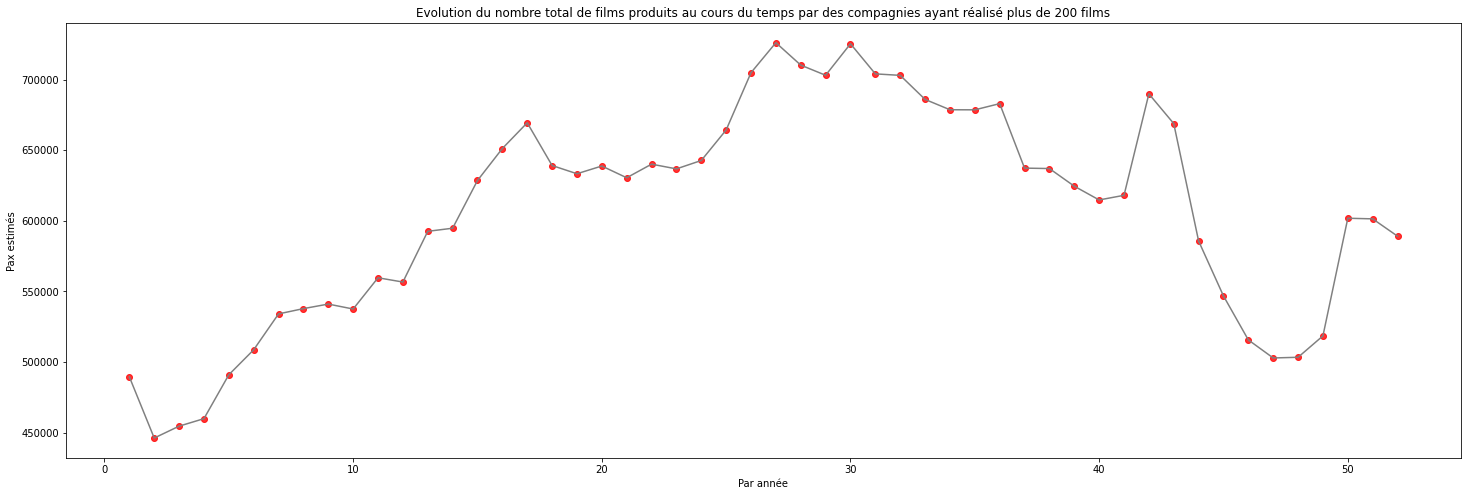

In [86]:

fig, ax = plt.subplots(figsize=(25,8))
sns.regplot(x=fqms_weekly.index, y=fqms_weekly["Pax Estimés"], color='red', fit_reg=False)
sns.lineplot(x="Semaine",y='Pax Estimés', data=fqms_weekly, color="gray")
ax.set(ylabel='Pax estimés', xlabel='Par année')
plt.title("Evolution du nombre total de films produits au cours du temps par des compagnies ayant réalisé plus de 200 films")

Text(0.5, 1.0, 'Evolution du nombre total de films produits au cours du temps par des compagnies ayant réalisé plus de 200 films')

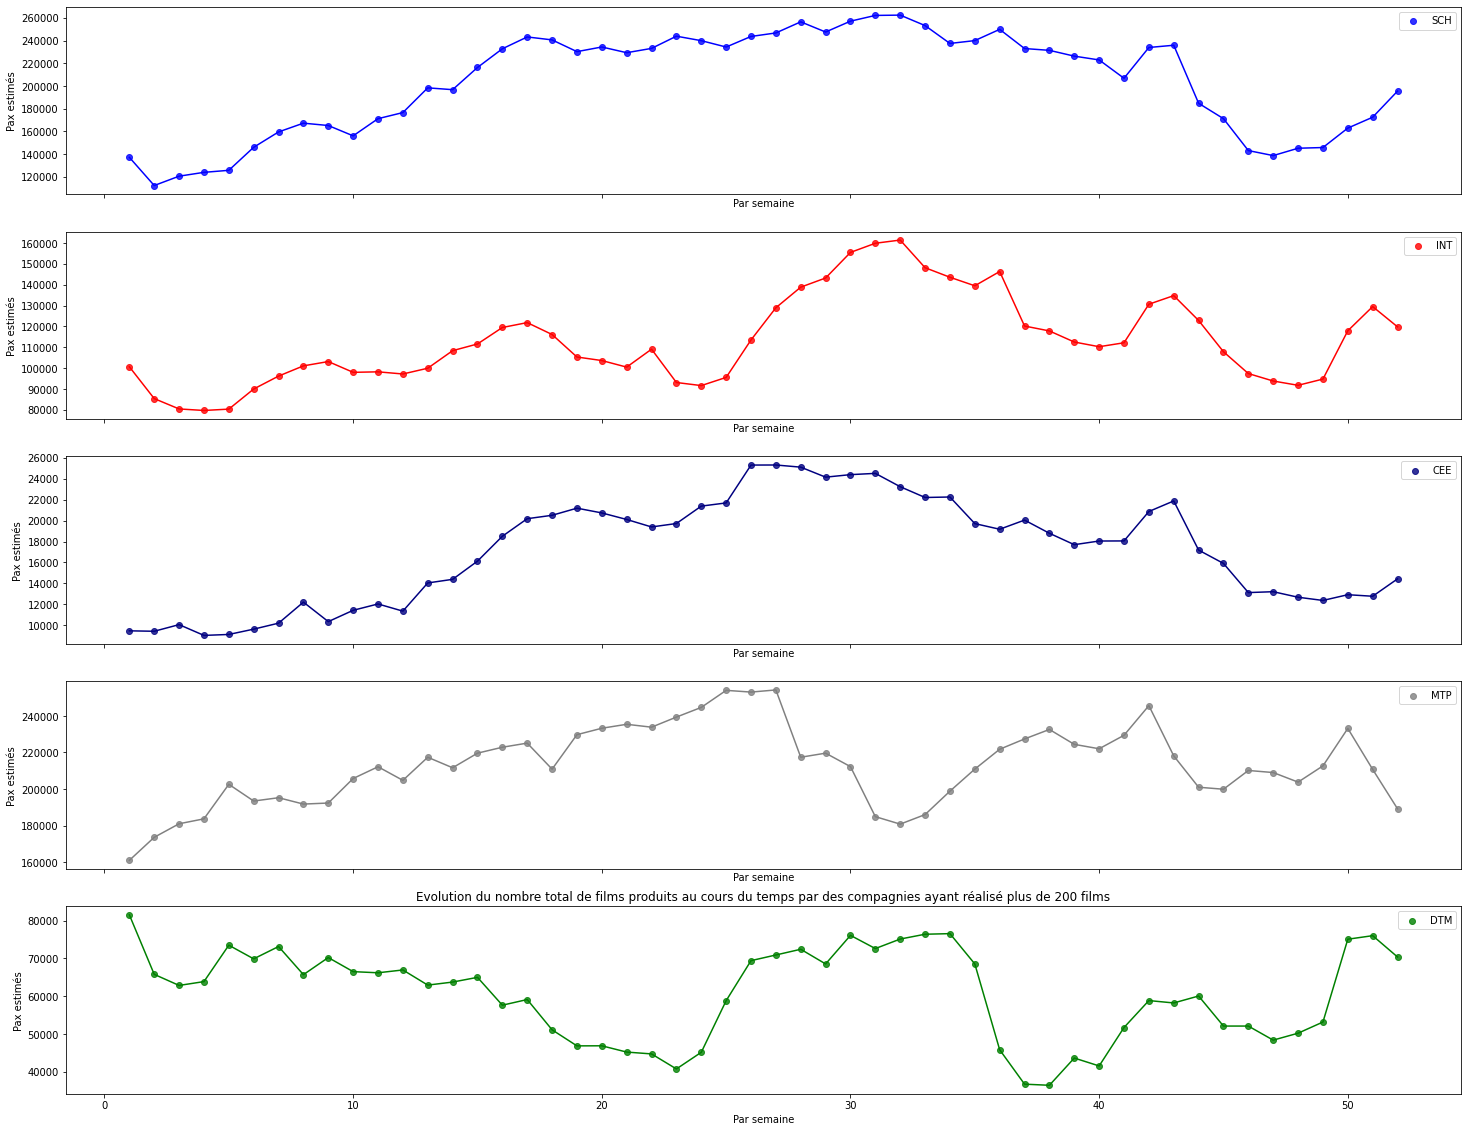

In [94]:
faisceaux =['SCH', 'INT', 'CEE', 'MTP', 'DTM']
color=['blue', 'red', 'navy', 'gray', 'green']
fig, ax = plt.subplots(5,1, sharex=True, figsize=(25,20))

for i in range(len(faisceaux)):
  fqms_weekly = fqms[fqms['Qualité']==faisceaux[i]].groupby('Semaine').agg({'Pax Estimés':'sum','LF%':'mean'})
  sns.regplot(ax=ax[i], x=fqms_weekly.index, y=fqms_weekly["Pax Estimés"], color=color[i], fit_reg=False, label=faisceaux[i])
  sns.lineplot(ax=ax[i], x="Semaine",y='Pax Estimés', data=fqms_weekly, color=color[i])
  ax[i].set(ylabel='Pax estimés', xlabel='Par semaine')
plt.title("Evolution du nombre total de films produits au cours du temps par des compagnies ayant réalisé plus de 200 films")

# Création de fonctions de visualisation

In [59]:
def scatter_plot_function(df, x, y, leg_label, coolor, reg_l): 
                                                    # df dataframe used, x = name of the variable on x axis, y = [y_1, y_2,...]
                                                    # where y_1, ... y_n_plots are the name of the variables plotted on y axis
                                                    # coolor the n_plots list of selected colors
                                                    # leg_label the list of the n_plots corresponding labels
                                                    # reg_l takes True or False depending on display of linear regression
  n_plots = len(y)
  #print(n_plots)
  X = np.array(df[x])
  Y = [i for i in range(n_plots)]
  for i in range(n_plots):
    Y[i] = np.array(df[y[i]]) 

  window_size = 100 
  window = np.ones(window_size)/float(window_size)
  p = figure(plot_width=800, plot_height=350, x_axis_type="linear")
  for i in range(n_plots):
    p.circle(X, Y[i], size=4, color=coolor[i], alpha=0.2, legend_label=leg_label[i])
    if reg_l :
      rl = reg_line(X, Y[i], coolor[i])
      p.add_layout(rl)
    else : 
      continue
  # design
  p.ygrid.band_fill_color = "olive"
  p.ygrid.band_fill_alpha = 0.1

  p.title.text = "Visualisation des données passagers et remplissage"
  p.legend.location = "top_left"
  p.grid.grid_line_alpha = 0

  return p



Ne fonctionne pas ... :(
  

In [60]:
p = scatter_plot_function(fqms, 'Date du vol',['Pax Estimés'], ['Pax Estimés'],['red'], True)


In [104]:
fqms.head()

,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,LPY,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,19.0,8.0,2015-01-05,OSA2,0.72,1,OS1A1
2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,TLS,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1


Affichage sur les fqms avec agrégation modifiable, variable d'affichage modifiable et choix de la fonction d'agrégation.

In [126]:
def affichage_fqms_fsc(agregation, variable_affichee, func):
                # agregation : observation par semaine, par jour, par année, par mois... ou sur prov/dst par ex.
                # variable affichee : LF%, Nombre de passagers estimés, etc. 
                # Fonction d'agrégation : 'mean' pour LF%, 'sum' pour Pax Estimés etc. 
  sns.set(style='darkgrid')
  faisceaux =['SCH', 'INT', 'CEE', 'MTP', 'DTM']
  color=['blue', 'red', 'navy', 'gray', 'green']
  fig, ax = plt.subplots(5,1, sharex=False, figsize=(25,40))

  for i in range(len(faisceaux)):
    fqms_date = fqms[fqms['Qualité']==faisceaux[i]].groupby(agregation).agg({variable_affichee :func})
    fqms_date['index']=fqms_date.index
    sns.regplot(ax=ax[i], x=fqms_date.index, y=fqms_date[variable_affichee], color=color[i], fit_reg=False, label=faisceaux[i])
    sns.lineplot(ax=ax[i], x='index',y=variable_affichee, data=fqms_date, color=color[i])
    ax[i].set(ylabel=variable_affichee)

  plt.title("Evolution du {}".format(variable_affichee)+" selon les {}".format(agregation)+" par faisceaux")





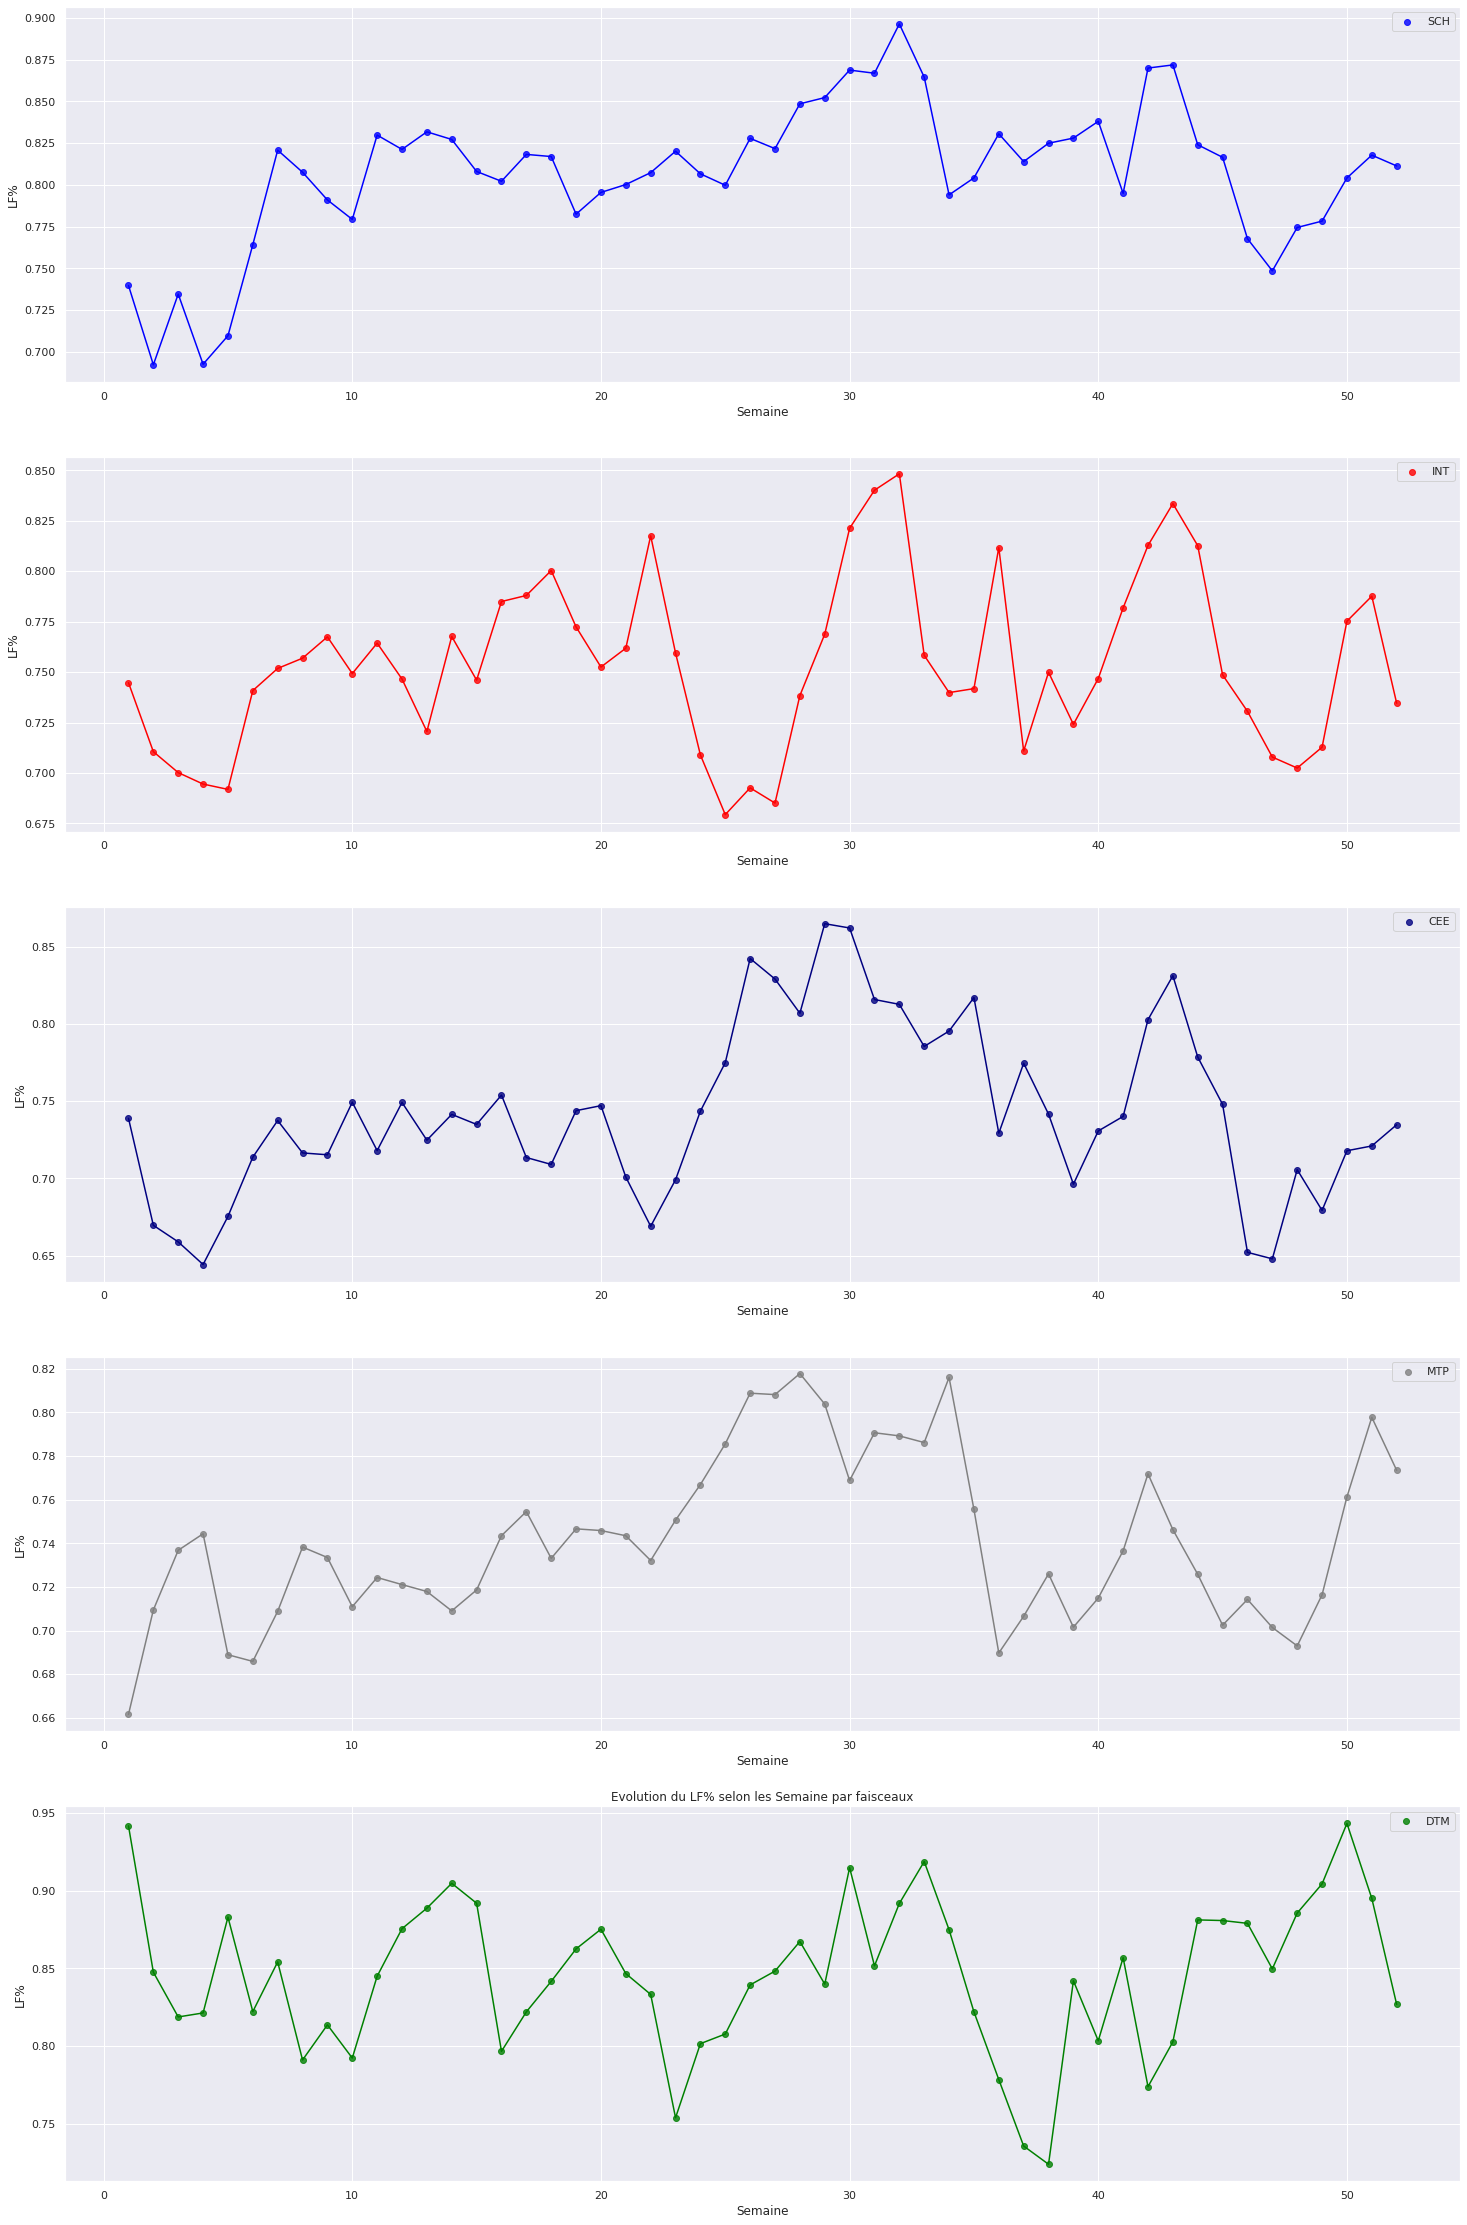

In [127]:
affichage_fqms_fsc('Semaine', 'LF%','mean')

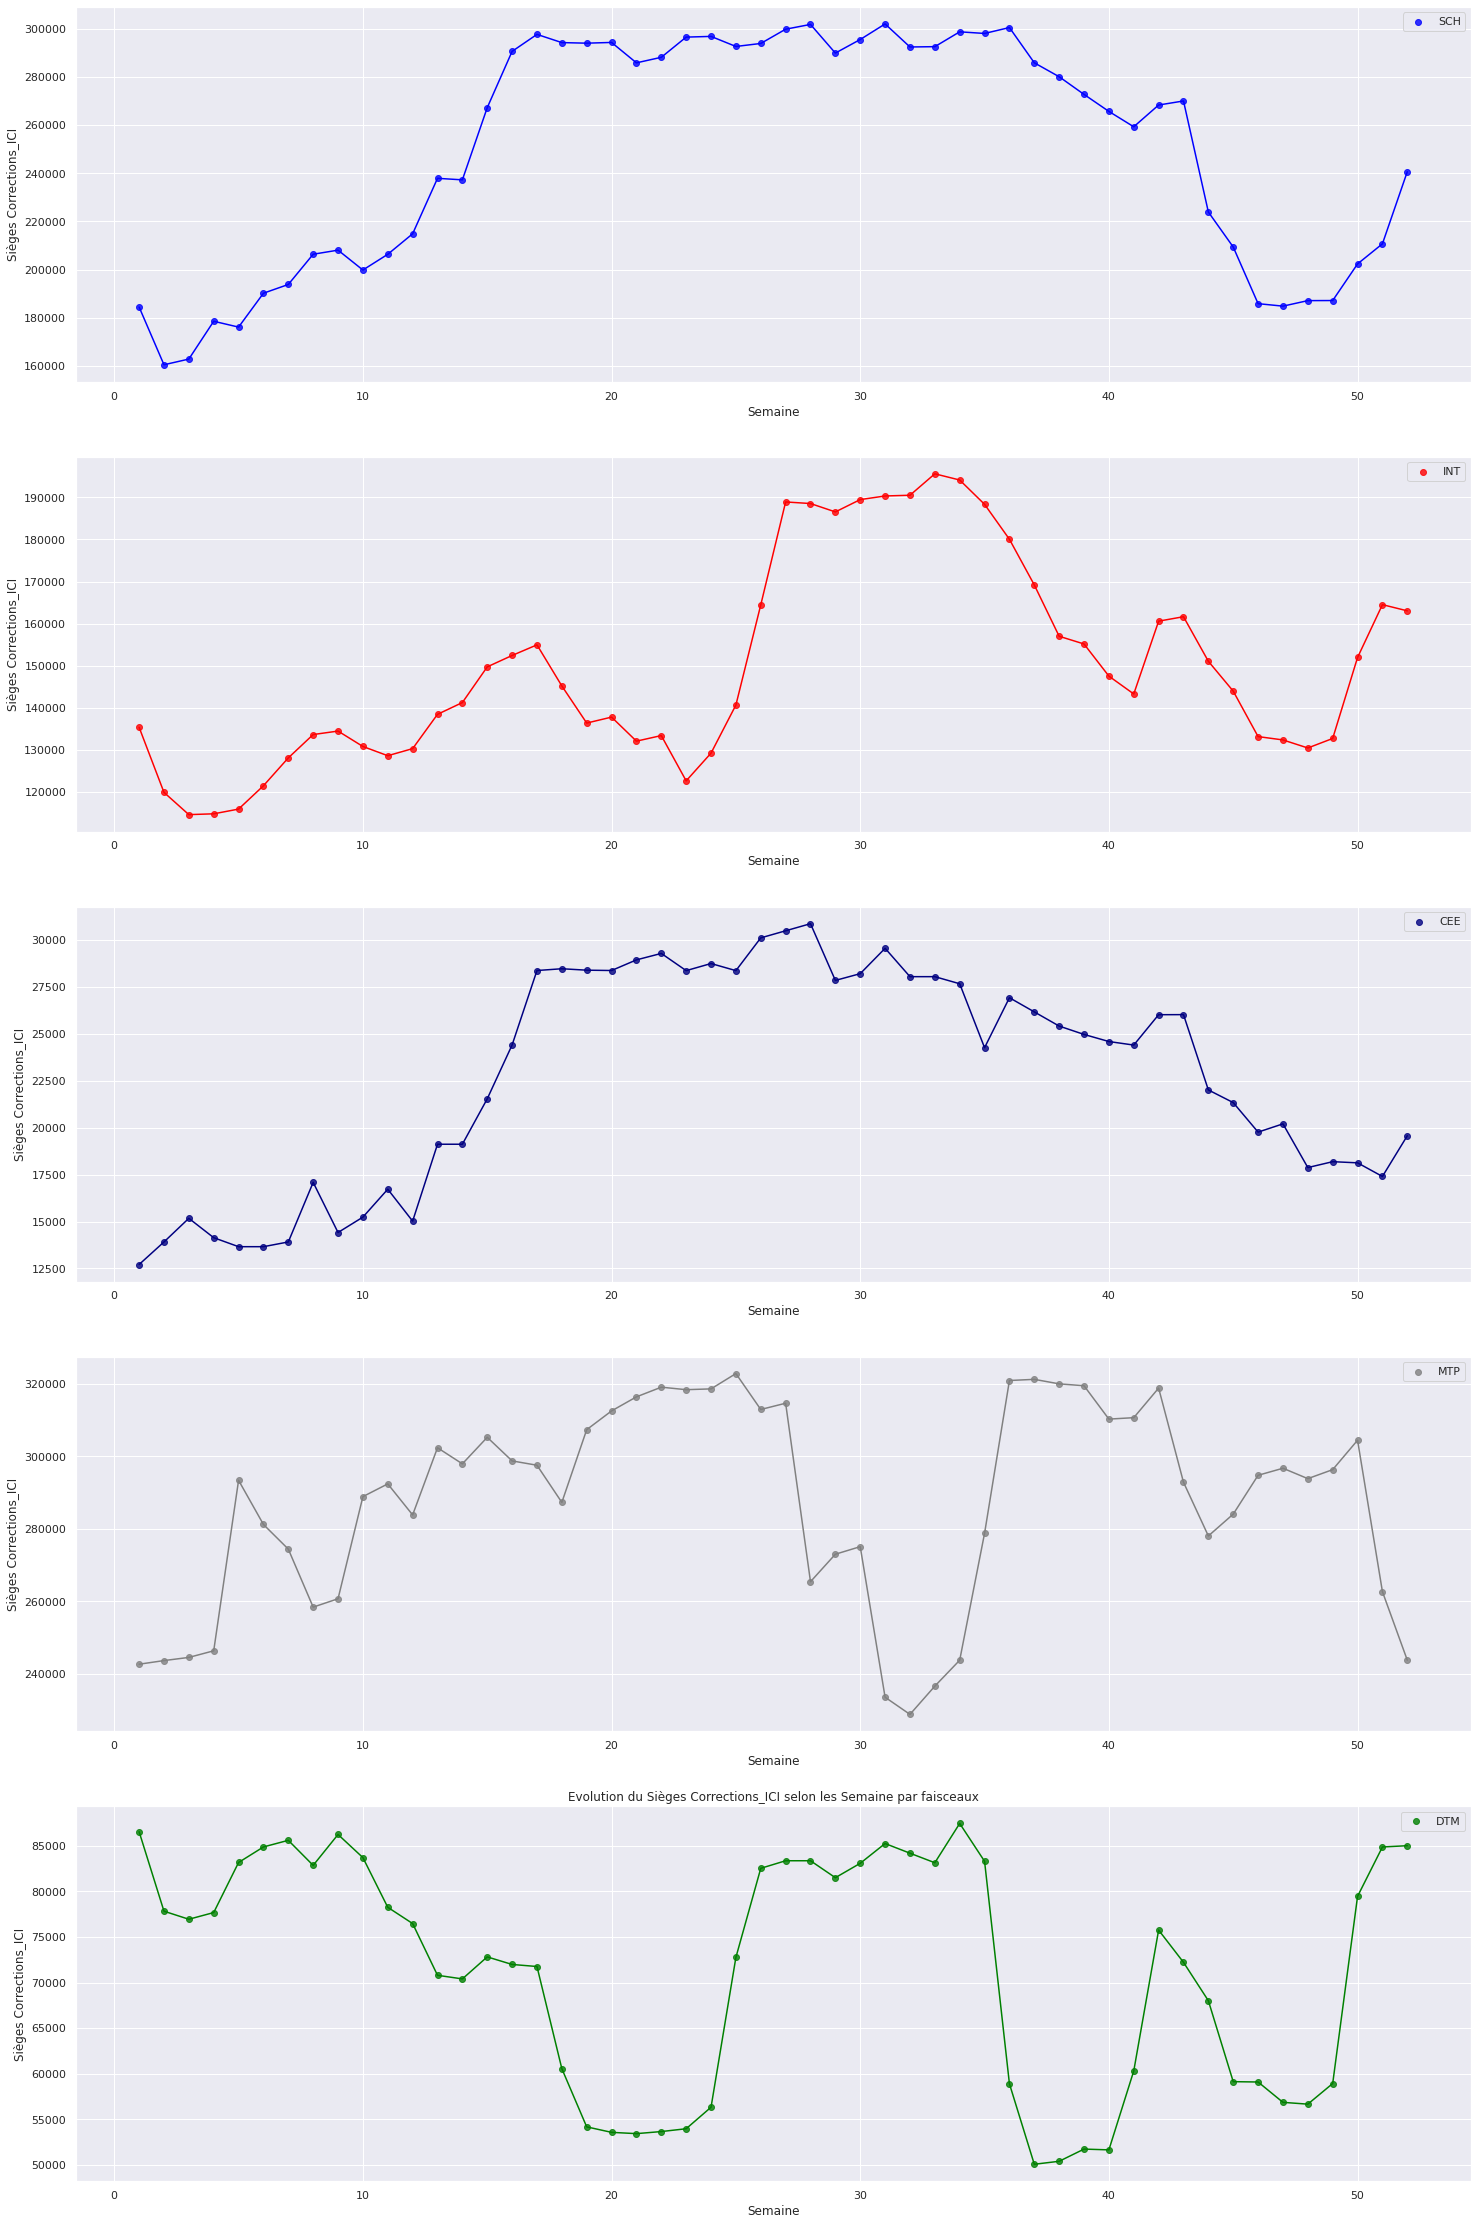

In [128]:
affichage_fqms_fsc('Semaine', 'Sièges Corrections_ICI','sum')

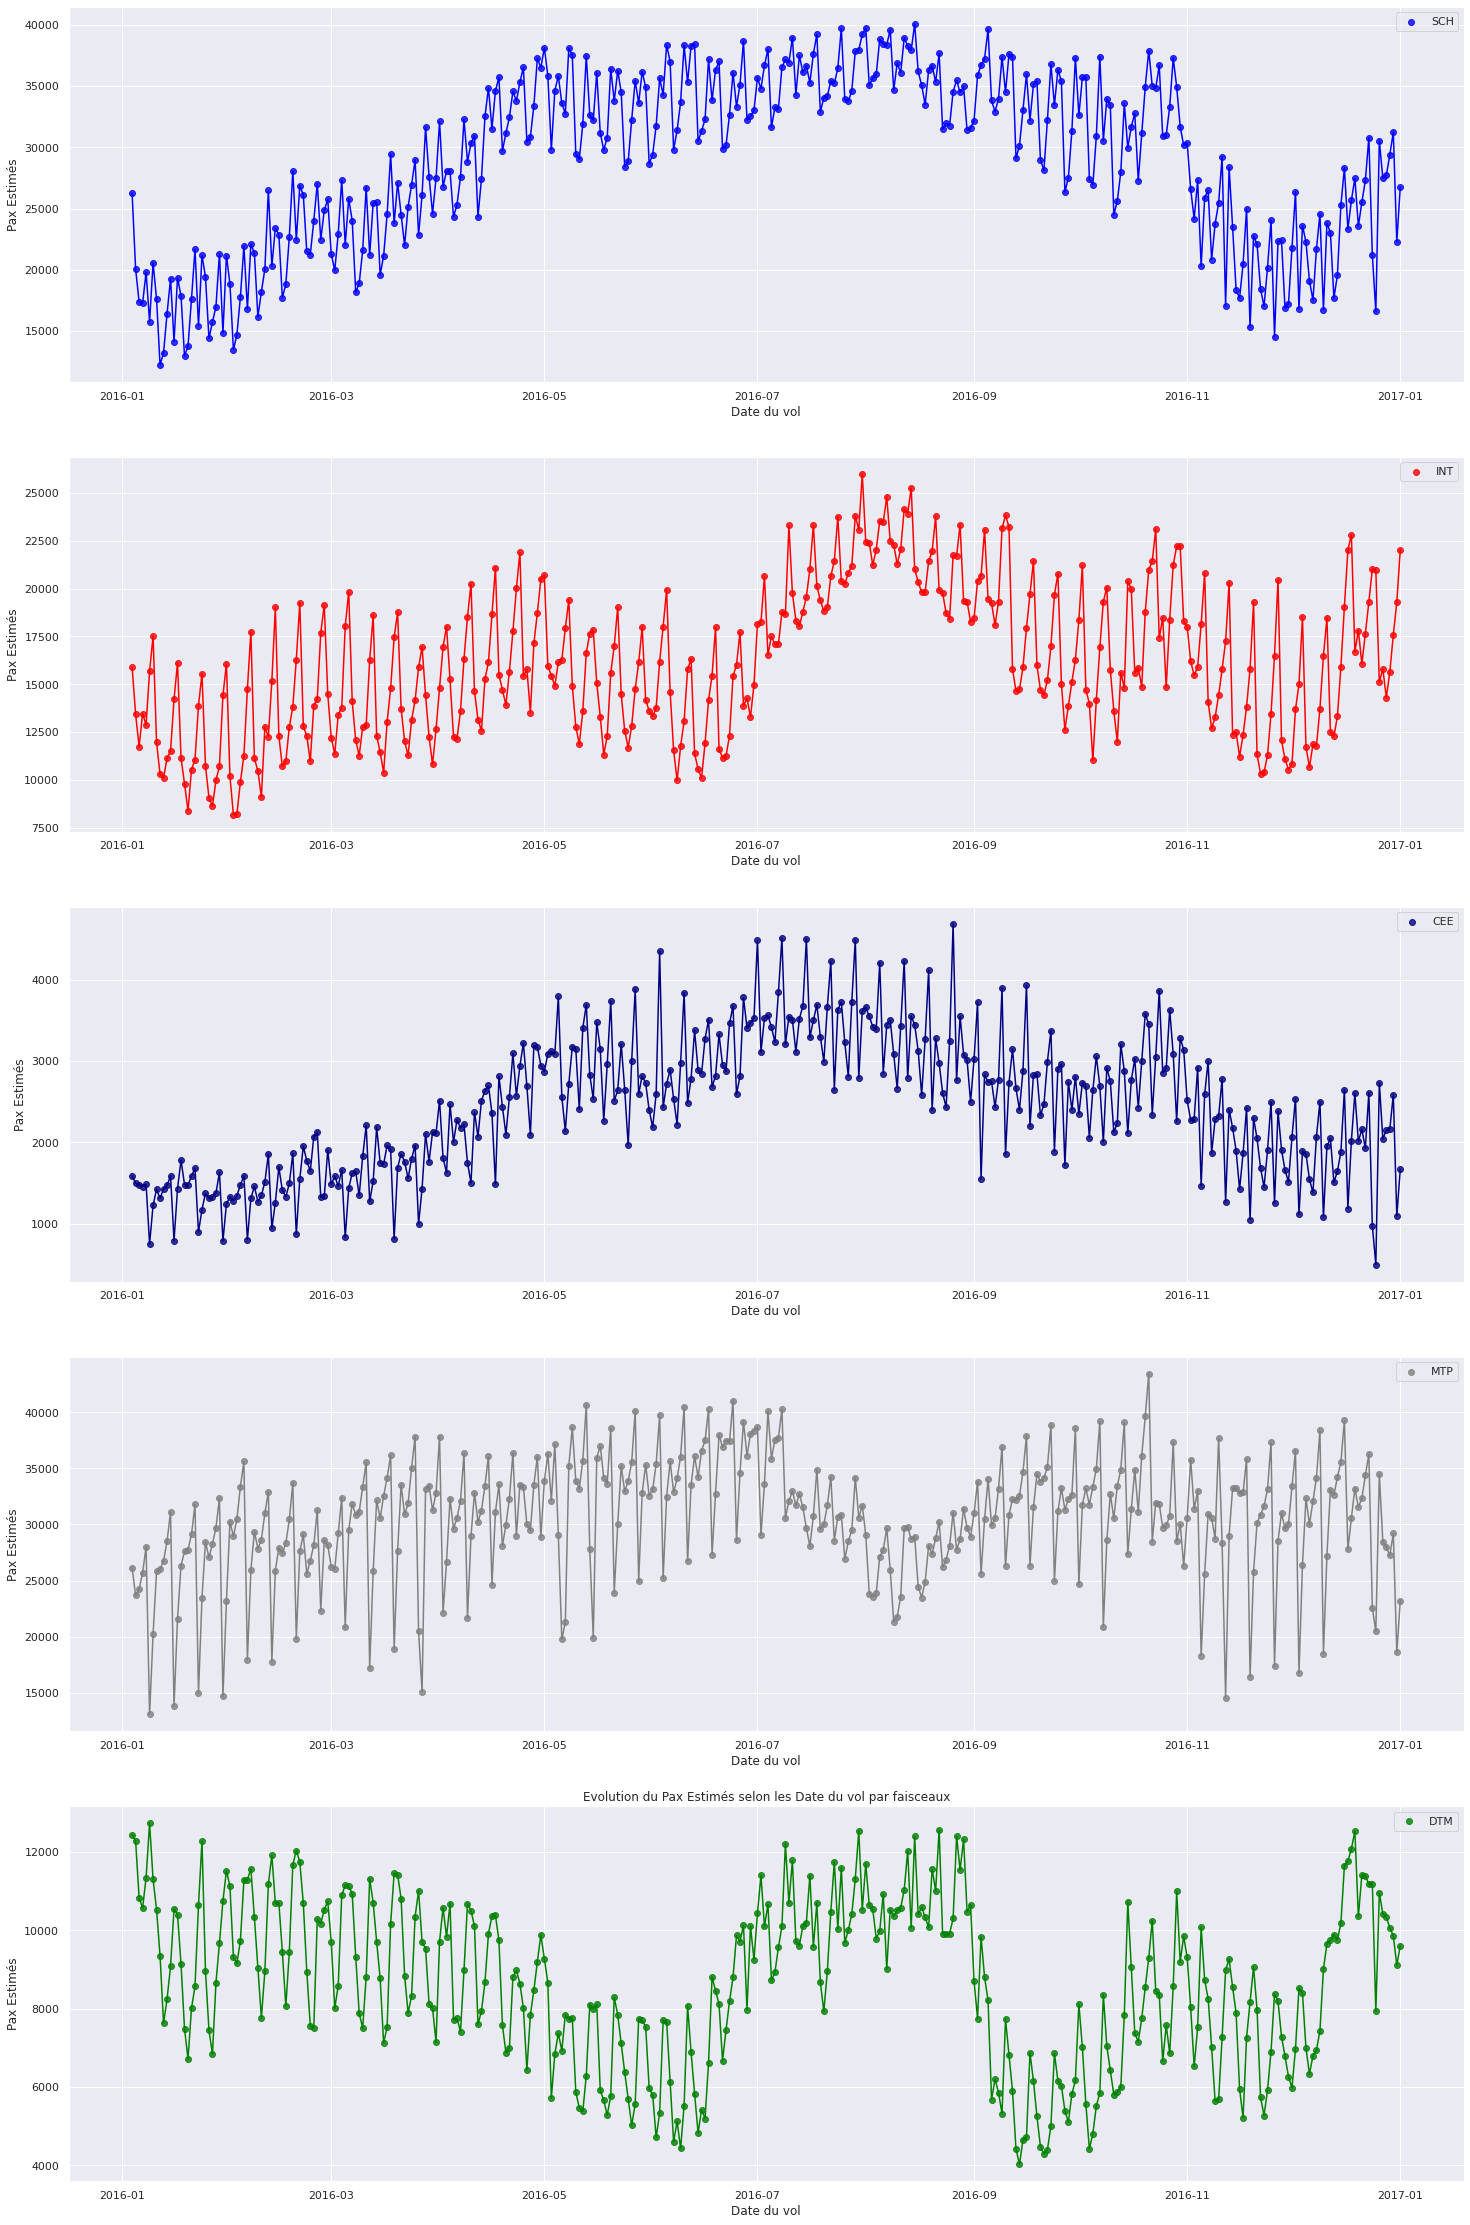

In [123]:
affichage_fqms_fsc('Date du vol','Pax Estimés','sum')

In [112]:
fqms.head()

,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,LPY,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,19.0,8.0,2015-01-05,OSA2,0.72,1,OS1A1
2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,TLS,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1
4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180.0,150.0,2015-01-05,OSA2,0.72,1,OS1A1


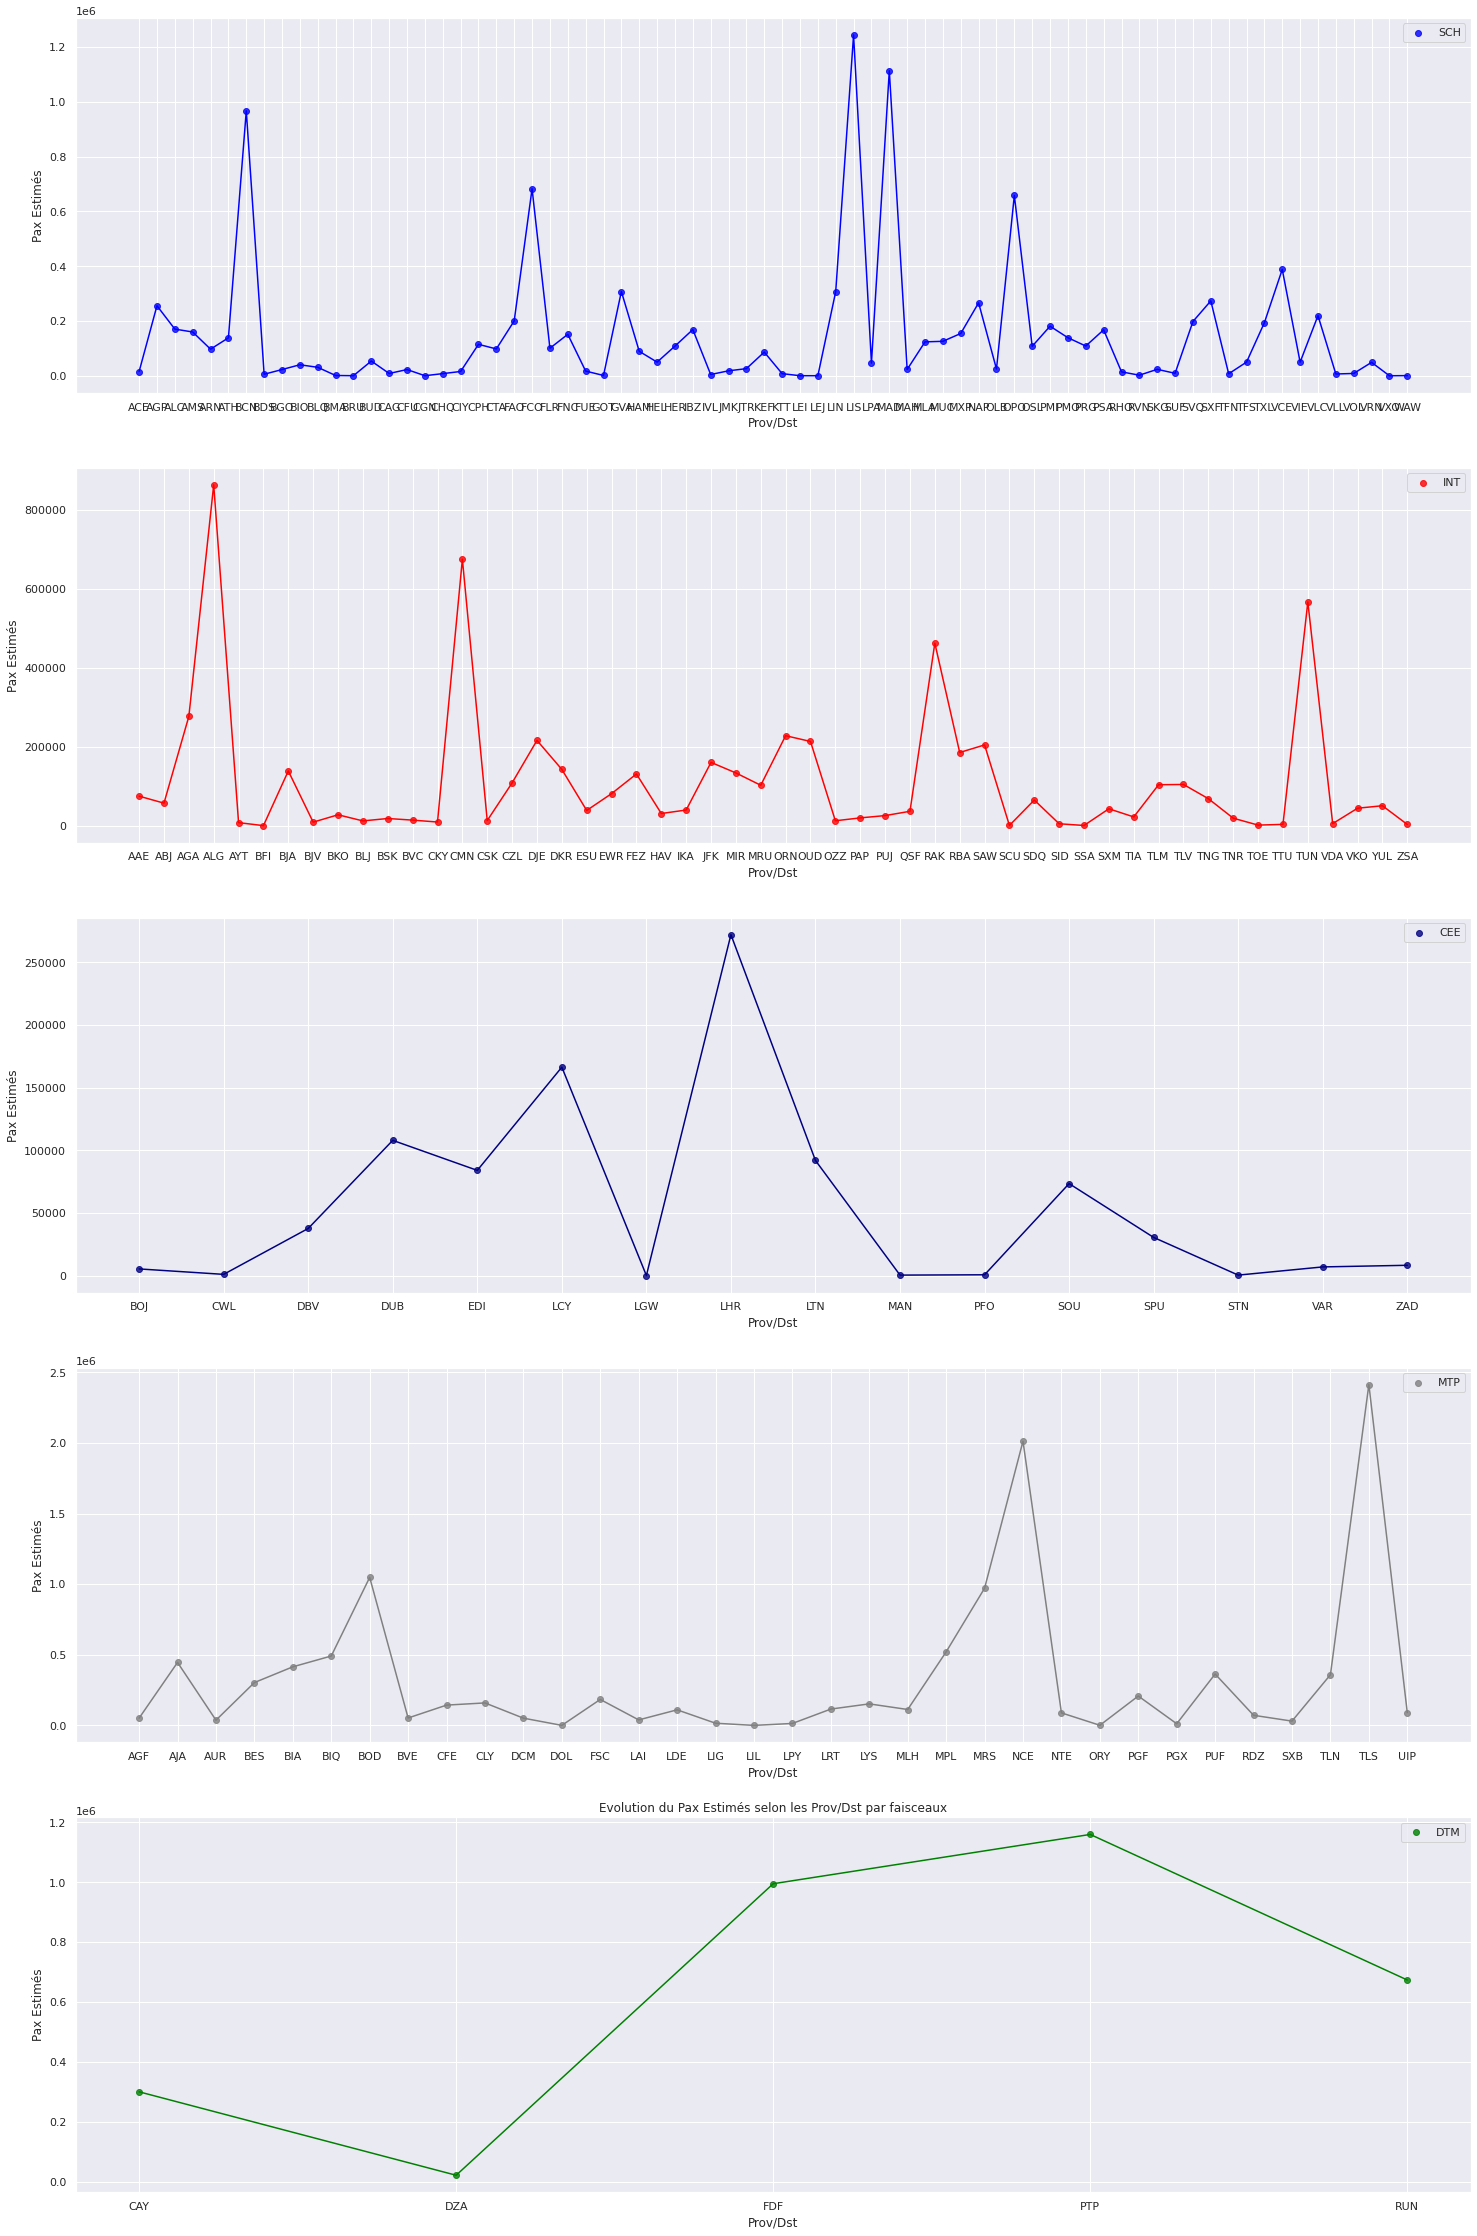

In [124]:
affichage_fqms_fsc('Prov/Dst','Pax Estimés','sum')